### Tugas Besar Visi Komputer
anggota kelompok:
* Muhammad Faqih A - 1301213056
* Muhammad Antarez Q - 1301210572
* Dian Syafilla - 1301213229

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf

# Cek ketersediaan GPU
print("Available GPUs:", tf.config.experimental.list_physical_devices('GPU'))

# Cek versi TensorFlow dan CUDA
print("TensorFlow version:", tf.__version__)


Available GPUs: []
TensorFlow version: 2.17.1


# Preprocessing

In [1]:
test_dir = r"D:\Tel-U\Semester7\VISKOM\fer\test"
train_dir = r"D:\Tel-U\Semester7\VISKOM\fer\train"

## Dataset Dengan 2 Class tanpa augmentasi

In [3]:
# Data generators without augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255  # Rescale pixel values to be between 0 and 1
)

validation_datagen = ImageDataGenerator(
    rescale=1./255  # Rescale pixel values to be between 0 and 1
)


In [4]:
# Define classes to include: only 'happy' and 'neutral'
class_subset = ['happy', 'sad']
batch_size=32

train_generator = train_datagen.flow_from_directory(
    directory=train_dir,            # Directory containing the training data
    target_size=(48, 48),           # Resizes all images to 48x48 pixels
    batch_size=batch_size,                  # Number of images per batch
    color_mode="grayscale",         # Converts the images to grayscale
    class_mode="categorical",       # Classifies the images into categories
    classes=class_subset            # Include only 'happy' and 'neutral'
)

validation_generator = validation_datagen.flow_from_directory(
    directory=test_dir,             # Directory containing the validation data
    target_size=(48, 48),           # Resizes all images to 48x48 pixels
    batch_size=batch_size,                  # Number of images per batch
    color_mode="grayscale",         # Converts the images to grayscale
    class_mode="categorical",       # Classifies the images into categories
    classes=class_subset            # Include only 'happy' and 'neutral'
)

Found 12045 images belonging to 2 classes.
Found 3021 images belonging to 2 classes.


In [ ]:
# Mendapatkan mapping label dari train_generator
class_indices = train_generator.class_indices
label_mapping = {v: k for k, v in class_indices.items()}  # Membalik key dan value
print(label_mapping)

{0: 'happy', 1: 'sad'}


## Seluruh Dataset Tanpa Augmentasi

In [ ]:
train_datagen = ImageDataGenerator(
    # rotation_range=10,
    # width_shift_range = 0.1,        # Randomly shift the width of images by up to 10%
    # height_shift_range = 0.1,       # Randomly shift the height of images by up to 10%
    # horizontal_flip = True,         # Flip images horizontally at random
    rescale = 1./255,               # Rescale pixel values to be between 0 and 1
    validation_split = 0.2          # Set aside 20% of the data for validation
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,              # Rescale pixel values to be between 0 and 1
    validation_split = 0.2          # Set aside 20% of the data for validation
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    directory = train_dir,           # Directory containing the training data
    target_size = (48, 48),          # Resizes all images to 48x48 pixels
    batch_size = 32,                 # Number of images per batch
    color_mode = "grayscale",        # Converts the images to grayscale
    class_mode = "categorical",      # Classifies the images into 7 categories
    subset = "training"              # Uses the training subset of the data
)

validation_generator = validation_datagen.flow_from_directory(
    directory = test_dir,            # Directory containing the validation data
    target_size = (48, 48),          # Resizes all images to 48x48 pixels
    batch_size = 32,                 # Number of images per batch
    color_mode = "grayscale",        # Converts the images to grayscale
    class_mode = "categorical",      # Classifies the images into 7 categories
    subset = "validation"            # Uses the validation subset of the data
)

Found 22619 images belonging to 6 classes.
Found 1410 images belonging to 6 classes.


In [ ]:
# Mendapatkan mapping label dari train_generator
class_indices = train_generator.class_indices
label_mapping = {v: k for k, v in class_indices.items()}  # Membalik key dan value
print(label_mapping)

{0: 'angry', 1: 'fearful', 2: 'happy', 3: 'neutral', 4: 'sad', 5: 'surprised'}


## Seluruh Dataset dan Augmentasi

In [5]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range = 0.1,        # Randomly shift the width of images by up to 10%
    height_shift_range = 0.1,       # Randomly shift the height of images by up to 10%
    horizontal_flip = True,         # Flip images horizontally at random
    rescale = 1./255               # Rescale pixel values to be between 0 and 1
    # validation_split = 0.2          # Set aside 20% of the data for validation
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255               # Rescale pixel values to be between 0 and 1
    # validation_split = 0.2          # Set aside 20% of the data for validation
)

In [6]:
train_generator = train_datagen.flow_from_directory(
    directory = train_dir,           # Directory containing the training data
    target_size = (48, 48),          # Resizes all images to 48x48 pixels
    batch_size = 32,                 # Number of images per batch
    color_mode = "grayscale",        # Converts the images to grayscale
    class_mode = "categorical",      # Classifies the images into 7 categories
    # subset = "training"              # Uses the training subset of the data
)

validation_generator = validation_datagen.flow_from_directory(
    directory = test_dir,            # Directory containing the validation data
    target_size = (48, 48),          # Resizes all images to 48x48 pixels
    batch_size = 32,                 # Number of images per batch
    color_mode = "grayscale",        # Converts the images to grayscale
    class_mode = "categorical",      # Classifies the images into 7 categories
    # subset = "validation"            # Uses the validation subset of the data
)

Found 28273 images belonging to 6 classes.
Found 7067 images belonging to 6 classes.


In [7]:
# Mendapatkan mapping label dari train_generator
class_indices = train_generator.class_indices
label_mapping = {v: k for k, v in class_indices.items()}  # Membalik key dan value
print(label_mapping)

{0: 'angry', 1: 'fearful', 2: 'happy', 3: 'neutral', 4: 'sad', 5: 'surprised'}


# Modeling

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, Concatenate, AveragePooling2D, Add, Lambda
import tensorflow as tf
from tensorflow.keras.layers import Activation
from tensorflow.keras.models import Model  # Tambahkan ini
from tensorflow.keras.optimizers import Adam  # Tambahkan ini


# Define Inception-ResNet-V2 block
def inception_resnet_block(x, scale, block_type, activation='relu'):
    '''Scale: scaling factor to scale the residual before adding back to the shortcut path (residual path)
       block_type: 'a', 'b', 'c', etc. Differentiates between different Inception-ResNet blocks
       activation: activation function to use'''

    if block_type == 'a':
        branch_1x1 = Conv2D(128, (1, 1), activation=activation, padding='same')(x)

        branch_3x3 = Conv2D(128, (1, 1), activation=activation, padding='same')(x)
        branch_3x3 = Conv2D(128, (3, 3), activation=activation, padding='same')(branch_3x3)

        branch_5x5 = Conv2D(128, (1, 1), activation=activation, padding='same')(x)
        branch_5x5 = Conv2D(128, (5, 5), activation=activation, padding='same')(branch_5x5)

        branch_pool = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
        branch_pool = Conv2D(128, (1, 1), activation=activation, padding='same')(branch_pool)

        output = Concatenate(axis=-1)([branch_1x1, branch_3x3, branch_5x5, branch_pool])

    elif block_type == 'b':
        branch_1x1 = Conv2D(256, (1, 1), activation=activation, padding='same')(x)

        branch_3x3 = Conv2D(256, (1, 1), activation=activation, padding='same')(x)
        branch_3x3 = Conv2D(256, (3, 3), activation=activation, padding='same')(branch_3x3)

        branch_5x5 = Conv2D(256, (1, 1), activation=activation, padding='same')(x)
        branch_5x5 = Conv2D(256, (5, 5), activation=activation, padding='same')(branch_5x5)

        branch_pool = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
        branch_pool = Conv2D(256, (1, 1), activation=activation, padding='same')(branch_pool)

        output = Concatenate(axis=-1)([branch_1x1, branch_3x3, branch_5x5, branch_pool])

    elif block_type == 'c':
        branch_1x1 = Conv2D(512, (1, 1), activation=activation, padding='same')(x)

        branch_3x3 = Conv2D(512, (1, 1), activation=activation, padding='same')(x)
        branch_3x3 = Conv2D(512, (3, 3), activation=activation, padding='same')(branch_3x3)

        branch_5x5 = Conv2D(512, (1, 1), activation=activation, padding='same')(x)
        branch_5x5 = Conv2D(512, (5, 5), activation=activation, padding='same')(branch_5x5)

        branch_pool = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
        branch_pool = Conv2D(512, (1, 1), activation=activation, padding='same')(branch_pool)

        output = Concatenate(axis=-1)([branch_1x1, branch_3x3, branch_5x5, branch_pool])

    else:
        raise ValueError("Block type must be 'a', 'b', or 'c'.")

    # Scale the residual
    scaled_residual = Lambda(lambda x: x * scale)(output)

    # Adjust the shape of the residual tensor to match the shape of the shortcut path
    residual_shape = tf.keras.backend.int_shape(x)
    scaled_residual = Conv2D(residual_shape[-1], (1, 1), padding='same')(scaled_residual)

    # Add the scaled residual back to the shortcut path
    output = Add()([x, scaled_residual])

    return output

# Input layer
input_layer = Input(shape=(48, 48, 1))

# Stem block
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Inception-ResNet-A blocks
for _ in range(3):
    x = inception_resnet_block(x, scale=0.1, block_type='a')

# Inception-ResNet-B blocks
x = AveragePooling2D((2, 2), padding='same')(x)
for _ in range(3):
    x = inception_resnet_block(x, scale=0.1, block_type='b')

# Inception-ResNet-C blocks
x = AveragePooling2D((2, 2), padding='same')(x)
for _ in range(3):
    x = inception_resnet_block(x, scale=0.1, block_type='c')

# Classification block
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(6, activation='softmax')(x)

# Define model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 48, 48, 1)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 48, 48, 32)        │             320 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 48, 48, 64)        │          18,496 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 24, 24, 64)        │               0 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 24, 24, 128)       │           8,320 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_5 (Conv2D)             │ (None, 24, 24, 128)       │           8,320 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 24, 24, 64)        │               0 │ max_pooling2d[0][0]        │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 24, 24, 128)       │           8,320 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 24, 24, 128)       │         147,584 │ conv2d_3[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_6 (Conv2D)             │ (None, 24, 24, 128)       │         409,728 │ conv2d_5[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_7 (Conv2D)             │ (None, 24, 24, 128)       │           8,320 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 24, 24, 512)       │               0 │ conv2d_2[0][0],            │
│                               │                           │                 │ conv2d_4[0][0],            │
│                               │                           │                 │ conv2d_6[0][0],            │
│                               │                           │                 │ conv2d_7[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lambda (Lambda)               │ (None, 24, 24, 512)       │               0 │ concatenate[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_8 (Conv2D)             │ (None, 24, 24, 64)        │          32,832 │ lambda[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add (Add)                     │ (None, 24, 24, 64)        │               0 │ max_pooling2d[0][0],       │
│                               │                           │               

 Total params: 36,542,662 (139.40 MB)

 Trainable params: 36,542,662 (139.40 MB)

 Non-trainable params: 0 (0.00 B)

# Train Model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the callback
checkpoint_callback = ModelCheckpoint(
    filepath='model.weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)



In [ ]:
# Convert to TensorFlow Dataset with repeat
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32),
        tf.TensorSpec(shape=(None, train_generator.num_classes), dtype=tf.float32)
    )
).repeat()  # Repeat indefinitely

validation_dataset = tf.data.Dataset.from_generator(
    lambda: validation_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32),
        tf.TensorSpec(shape=(None, validation_generator.num_classes), dtype=tf.float32)
    )
).repeat()  # Repeat indefinitely

## Dataset Dengan 2 Class tanpa augmentasi

In [ ]:
# Train the model with callback
history = model.fit(
    train_dataset,                     # Menggunakan dataset TensorFlow untuk training
    steps_per_epoch=len(train_generator),  # Jumlah langkah per epoch berdasarkan panjang train_generator
    epochs=30,                         # Jumlah epoch pelatihan
    validation_data=validation_dataset,  # Dataset validasi
    validation_steps=len(validation_generator),  # Jumlah langkah validasi
    callbacks=[checkpoint_callback]
)
model.save(r"D:\Tel-U\Semester7\VISKOM\fer\inception-resnet_2c.keras")

Epoch 1/30
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6114 - loss: 0.6651
Epoch 1: val_accuracy did not improve from 0.70312
377/377 ━━━━━━━━━━━━━━━━━━━━ 2273s 6s/step - accuracy: 0.6114 - loss: 0.6651 - val_accuracy: 0.6101 - val_loss: 0.6630
Epoch 2/30
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6302 - loss: 0.6545
Epoch 2: val_accuracy did not improve from 0.70312
377/377 ━━━━━━━━━━━━━━━━━━━━ 2315s 6s/step - accuracy: 0.6302 - loss: 0.6545 - val_accuracy: 0.6905 - val_loss: 0.5976
Epoch 3/30
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6955 - loss: 0.5880
Epoch 3: val_accuracy improved from 0.70312 to 0.76034, saving model to model.weights.h5
377/377 ━━━━━━━━━━━━━━━━━━━━ 2268s 6s/step - accuracy: 0.6956 - loss: 0.5879 - val_accuracy: 0.7603 - val_loss: 0.4977
Epoch 4/30
377/377 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7711 - loss: 0.4883
Epoch 4: val_accuracy improved from 0.76034 to 0.80602, saving model to model.weights.h5
377/377 ━━━━━━━━━━━━━━━

## Seluruh Dataset Tanpa Augmentasi

In [ ]:
# Train the model with callback
history = model.fit(
    train_dataset,                     # Menggunakan dataset TensorFlow untuk training
    steps_per_epoch=len(train_generator)//32,  # Jumlah langkah per epoch berdasarkan panjang train_generator
    epochs=50,                         # Jumlah epoch pelatihan
    validation_data=validation_dataset,  # Dataset validasi
    validation_steps=len(validation_generator)//32,  # Jumlah langkah validasi
    callbacks=[checkpoint_callback]
)
model.save(r"D:\Tel-U\Semester7\VISKOM\fer\inception-resnet_6c.keras")

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2847 - loss: 1.7410
Epoch 1: val_accuracy did not improve from 0.29247
30/30 ━━━━━━━━━━━━━━━━━━━━ 122s 4s/step - accuracy: 0.2845 - loss: 1.7403 - val_accuracy: 0.2882 - val_loss: 1.6898
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2746 - loss: 1.7000
Epoch 2: val_accuracy did not improve from 0.29247
30/30 ━━━━━━━━━━━━━━━━━━━━ 135s 5s/step - accuracy: 0.2745 - loss: 1.7002 - val_accuracy: 0.2760 - val_loss: 1.6944
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2907 - loss: 1.7173
Epoch 3: val_accuracy improved from 0.29247 to 0.30323, saving model to model.weights.h5
30/30 ━━━━━━━━━━━━━━━━━━━━ 135s 5s/step - accuracy: 0.2910 - loss: 1.7167 - val_accuracy: 0.3032 - val_loss: 1.6797
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2920 - loss: 1.6999
Epoch 4: val_accuracy did not improve from 0.30323
30/30 ━━━━━━━━━━━━━━━━━━━━ 133s 4s/step - accuracy: 0.2918 - loss: 1.7001 - va

## Seluruh Dataset Dengan Augmentasi

In [ ]:
# Memuat kembali bobot model
model.load_weights(r'D:\Tel-U\Semester7\VISKOM\fer\model.weights.h5')

In [ ]:
# Train the model with callback
history = model.fit(
    train_dataset,                     # Menggunakan dataset TensorFlow untuk training
    steps_per_epoch=len(train_generator)//32,  # Jumlah langkah per epoch berdasarkan panjang train_generator
    epochs=5,                         # Jumlah epoch pelatihan
    validation_data=validation_dataset,  # Dataset validasi
    validation_steps=len(validation_generator)//32,  # Jumlah langkah validasi
    callbacks=[checkpoint_callback]
)

model.save(r"D:\Tel-U\Semester7\VISKOM\fer\inception-resnet_FER.keras")

Epoch 1/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.6648 - loss: 0.8647 
Epoch 1: val_accuracy improved from 0.62063 to 0.63021, saving model to model.weights.h5
27/27 ━━━━━━━━━━━━━━━━━━━━ 318s 12s/step - accuracy: 0.6642 - loss: 0.8663 - val_accuracy: 0.6302 - val_loss: 1.0097
Epoch 2/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.6474 - loss: 0.9048 
Epoch 2: val_accuracy improved from 0.63021 to 0.65104, saving model to model.weights.h5
27/27 ━━━━━━━━━━━━━━━━━━━━ 315s 12s/step - accuracy: 0.6473 - loss: 0.9045 - val_accuracy: 0.6510 - val_loss: 0.9781
Epoch 3/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.6628 - loss: 0.8458 
Epoch 3: val_accuracy did not improve from 0.65104
27/27 ━━━━━━━━━━━━━━━━━━━━ 313s 12s/step - accuracy: 0.6623 - loss: 0.8479 - val_accuracy: 0.6250 - val_loss: 0.9752
Epoch 4/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.6705 - loss: 0.8590 
Epoch 4: val_accuracy did not improve from 0.65104
27/27 ━━━━━━━━━━━━━━━━━━━━ 313s 1

In [ ]:
#Menyimpan bobot model
model.save_weights(r'D:\Tel-U\Semester7\VISKOM\fer\model.weights.h5')
print("Bobot model telah disimpan ke file 'model_weights.h5'.")

Bobot model telah disimpan ke file 'model_weights.h5'.


# Evaluation

## Dataset Dengan 2 Class tanpa augmentasi

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


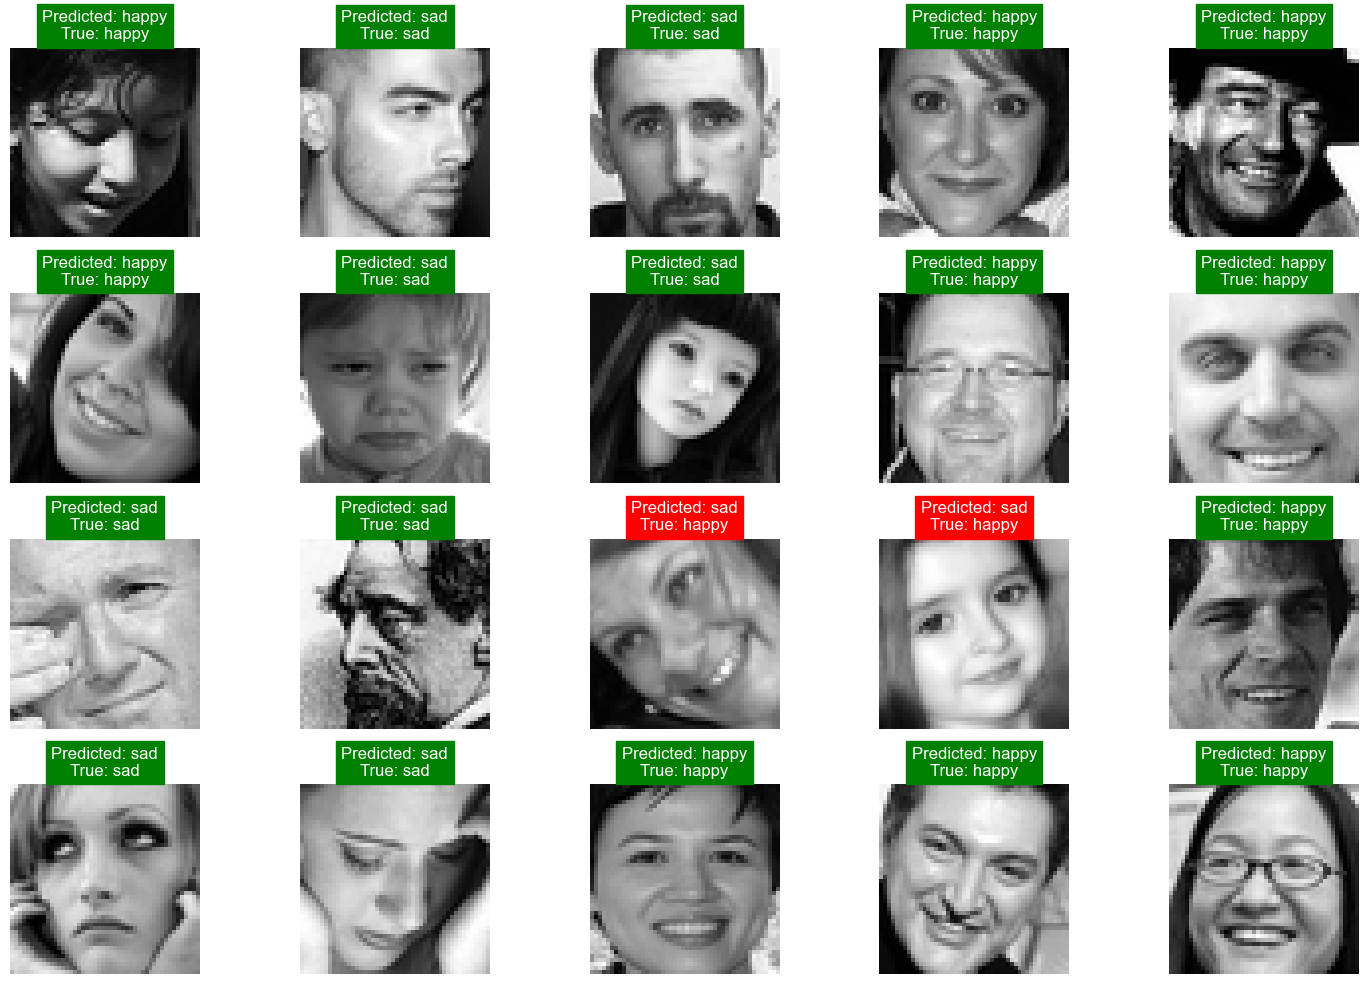

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the get_emotion function
def get_emotion(ohv):
    indx = np.argmax(ohv)
    emotions = ['happy', 'sad']
    return emotions[indx]

# Function to filter batches for specific labels
def filter_happy_neutral(generator):
    filtered_images = []
    filtered_labels = []

    for i in range(len(generator)):
        x_batch, y_batch = generator[i]

        # Filter the batch for only happy and neutral labels
        valid_indices = [idx for idx, label in enumerate(y_batch) if np.argmax(label) in [0, 1]]

        if valid_indices:
            filtered_images.append(x_batch[valid_indices])
            filtered_labels.append(y_batch[valid_indices])

    # Concatenate all filtered batches
    return np.concatenate(filtered_images, axis=0), np.concatenate(filtered_labels, axis=0)

# Filter the validation generator
x_filtered, y_filtered = filter_happy_neutral(validation_generator)

# Select a random subset of 20 images
num_images = 20
random_indices = np.random.choice(len(x_filtered), size=num_images, replace=False)

# Initialize lists to store images, labels, and predictions
x_test_batch = x_filtered[random_indices]
y_test_batch = y_filtered[random_indices]
predictions_batch = model.predict(x_test_batch)

# Display the images with colored backgrounds based on prediction correctness
plt.figure(figsize=(15, 10))
for i in range(num_images):
    plt.subplot(4, 5, i + 1)  # 4 rows, 5 columns
    plt.imshow(x_test_batch[i], cmap='gray')

    # Determine background color based on prediction correctness
    if np.argmax(predictions_batch[i]) == np.argmax(y_test_batch[i]):
        background_color = 'green'  # Correct prediction
    else:
        background_color = 'red'    # Incorrect prediction

    plt.title(f"Predicted: {get_emotion(predictions_batch[i])}\nTrue: {get_emotion(y_test_batch[i])}",
              backgroundcolor=background_color, color='white')
    plt.axis('off')

plt.tight_layout()
plt.show()


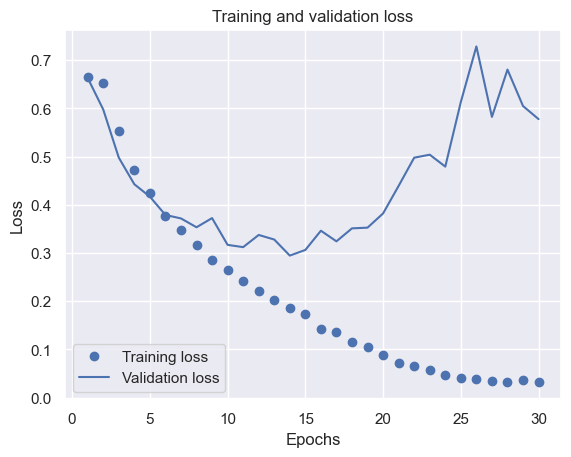

In [ ]:
# Plot the train and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

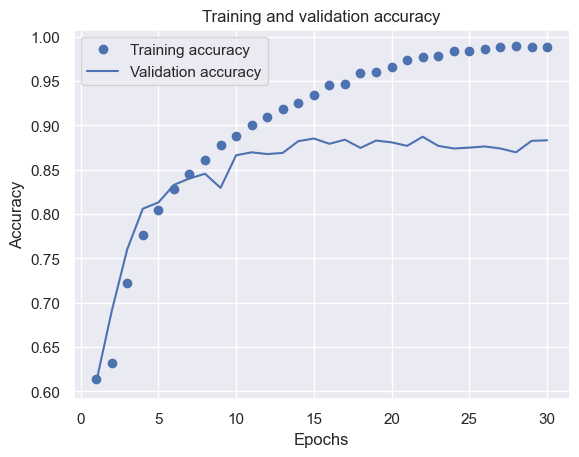

In [ ]:
# Plot the train and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

95/95 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step


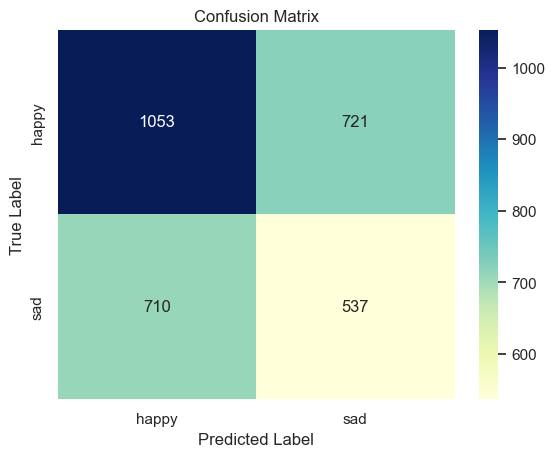

Classification Report:
               precision    recall  f1-score   support

       happy       0.60      0.59      0.60      1774
         sad       0.43      0.43      0.43      1247

    accuracy                           0.53      3021
   macro avg       0.51      0.51      0.51      3021
weighted avg       0.53      0.53      0.53      3021



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Get the true labels and predicted labels for the validation set
validation_labels = validation_generator.classes
validation_pred_probs = model.predict(validation_generator)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(validation_generator.class_indices.keys())

# Plot the confusion matrix
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
class_report = classification_report(validation_labels, validation_pred_labels, target_names=class_names)
print("Classification Report:\n", class_report)

## Seluruh Dataset Tanpa Augmentasi

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 890ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step


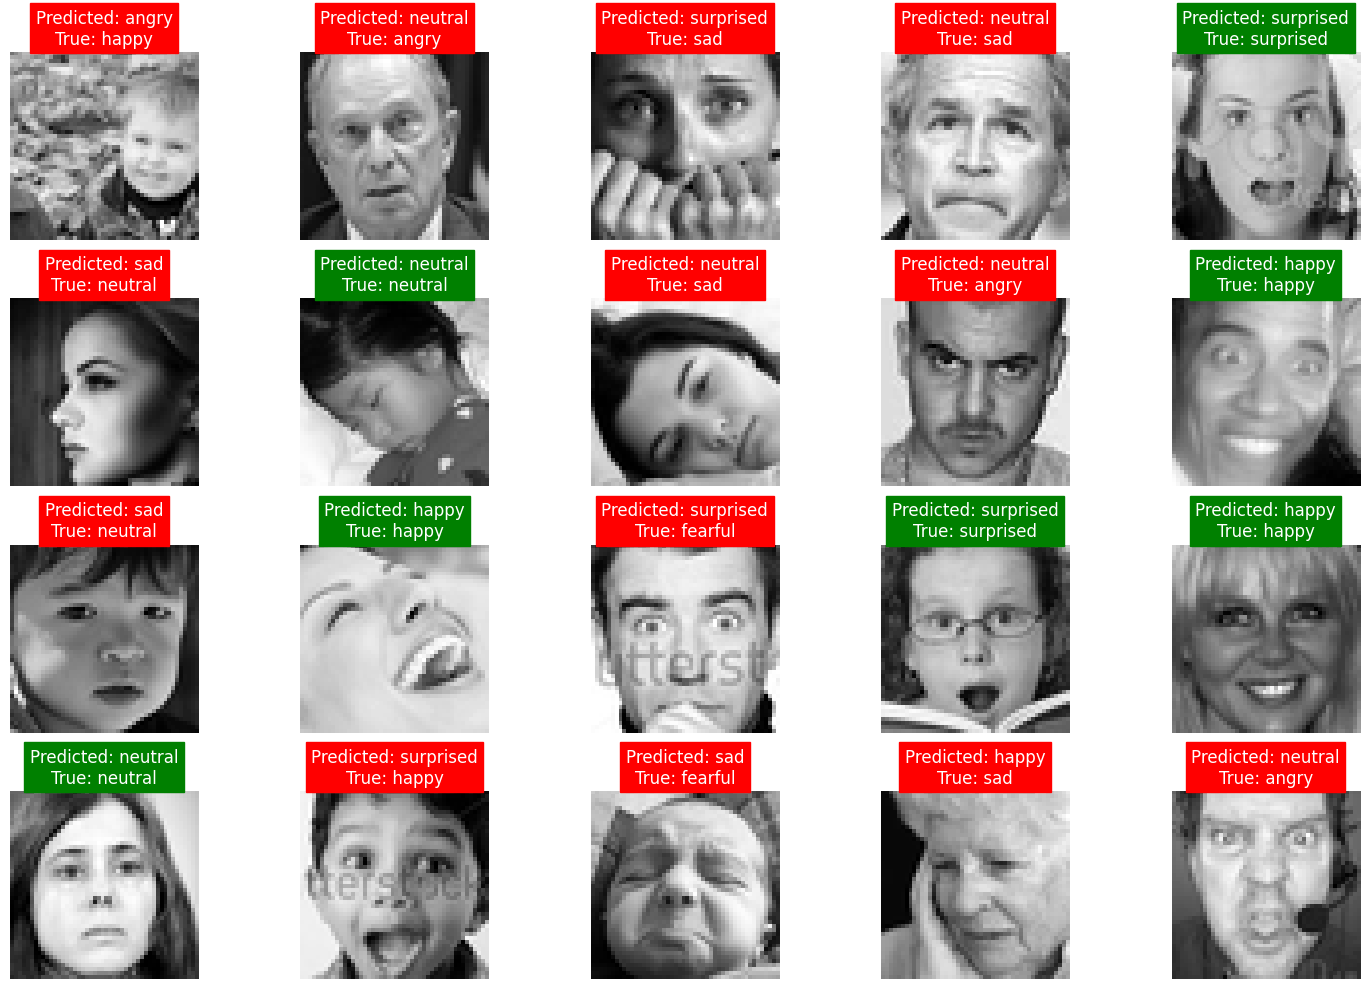

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the get_emotion function
def get_emotion(ohv):
    indx = np.argmax(ohv)
    emotions = ['angry', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
    return emotions[indx]

# Load a batch of random images from the test dataset
num_images = 20
random_indices = np.random.randint(len(validation_generator), size=num_images)

# Initialize lists to store images, labels, and predictions
x_test_batch = []
y_test_batch = []
predictions_batch = []

# Retrieve images, labels, and predictions for each random index
for idx in random_indices:
    x_batch, y_batch = validation_generator[idx]
    x_test_batch.append(x_batch)
    y_test_batch.append(y_batch)
    predictions_batch.append(model.predict(x_batch))

# Concatenate the lists to form batches of images, labels, and predictions
x_test_batch = np.concatenate(x_test_batch, axis=0)
y_test_batch = np.concatenate(y_test_batch, axis=0)
predictions_batch = np.concatenate(predictions_batch, axis=0)

# Display the images with colored backgrounds based on prediction correctness
plt.figure(figsize=(15, 10))
for i in range(num_images):
    plt.subplot(4, 5, i + 1)  # Thay đổi 2 thành 4 để hiển thị 4 hàng
    plt.imshow(x_test_batch[i], cmap='gray')

    # Determine background color based on prediction correctness
    if np.argmax(predictions_batch[i]) == np.argmax(y_test_batch[i]):
        background_color = 'green'  # Correct prediction
    else:
        background_color = 'red'    # Incorrect prediction

    plt.title(f"Predicted: {get_emotion(predictions_batch[i])}\nTrue: {get_emotion(y_test_batch[i])}",
              backgroundcolor=background_color, color='white')
    plt.axis('off')

plt.tight_layout()
plt.show()

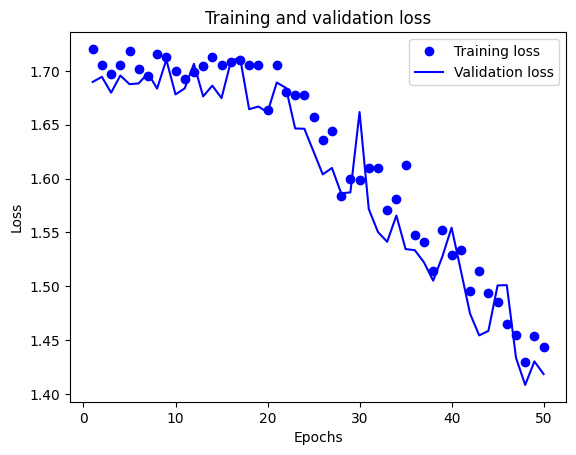

In [ ]:
# Plot the train and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

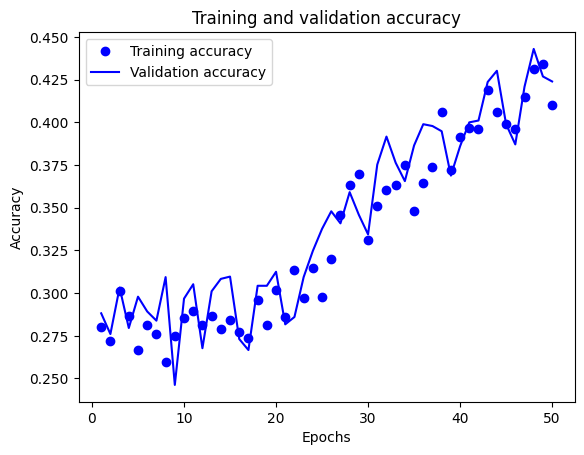

In [ ]:
# Plot the train and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

C:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


45/45 ━━━━━━━━━━━━━━━━━━━━ 33s 728ms/step


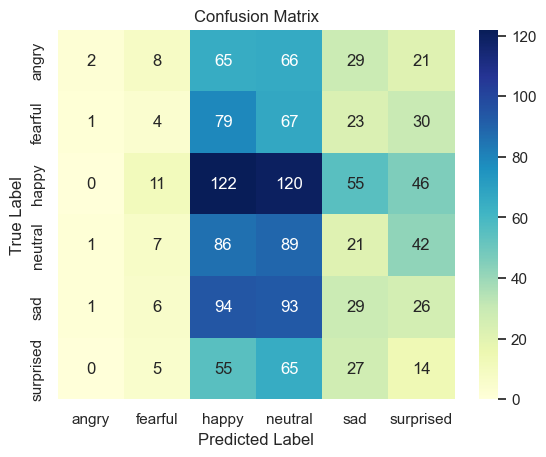

Classification Report:
               precision    recall  f1-score   support

       angry       0.40      0.01      0.02       191
     fearful       0.10      0.02      0.03       204
       happy       0.24      0.34      0.29       354
     neutral       0.18      0.36      0.24       246
         sad       0.16      0.12      0.13       249
   surprised       0.08      0.08      0.08       166

    accuracy                           0.18      1410
   macro avg       0.19      0.16      0.13      1410
weighted avg       0.20      0.18      0.15      1410



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Get the true labels and predicted labels for the validation set
validation_labels = validation_generator.classes
validation_pred_probs = model.predict(validation_generator)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(validation_generator.class_indices.keys())

# Plot the confusion matrix
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
class_report = classification_report(validation_labels, validation_pred_labels, target_names=class_names)
print("Classification Report:\n", class_report)

## Seluruh Dataset Dengan Augmentasi




1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


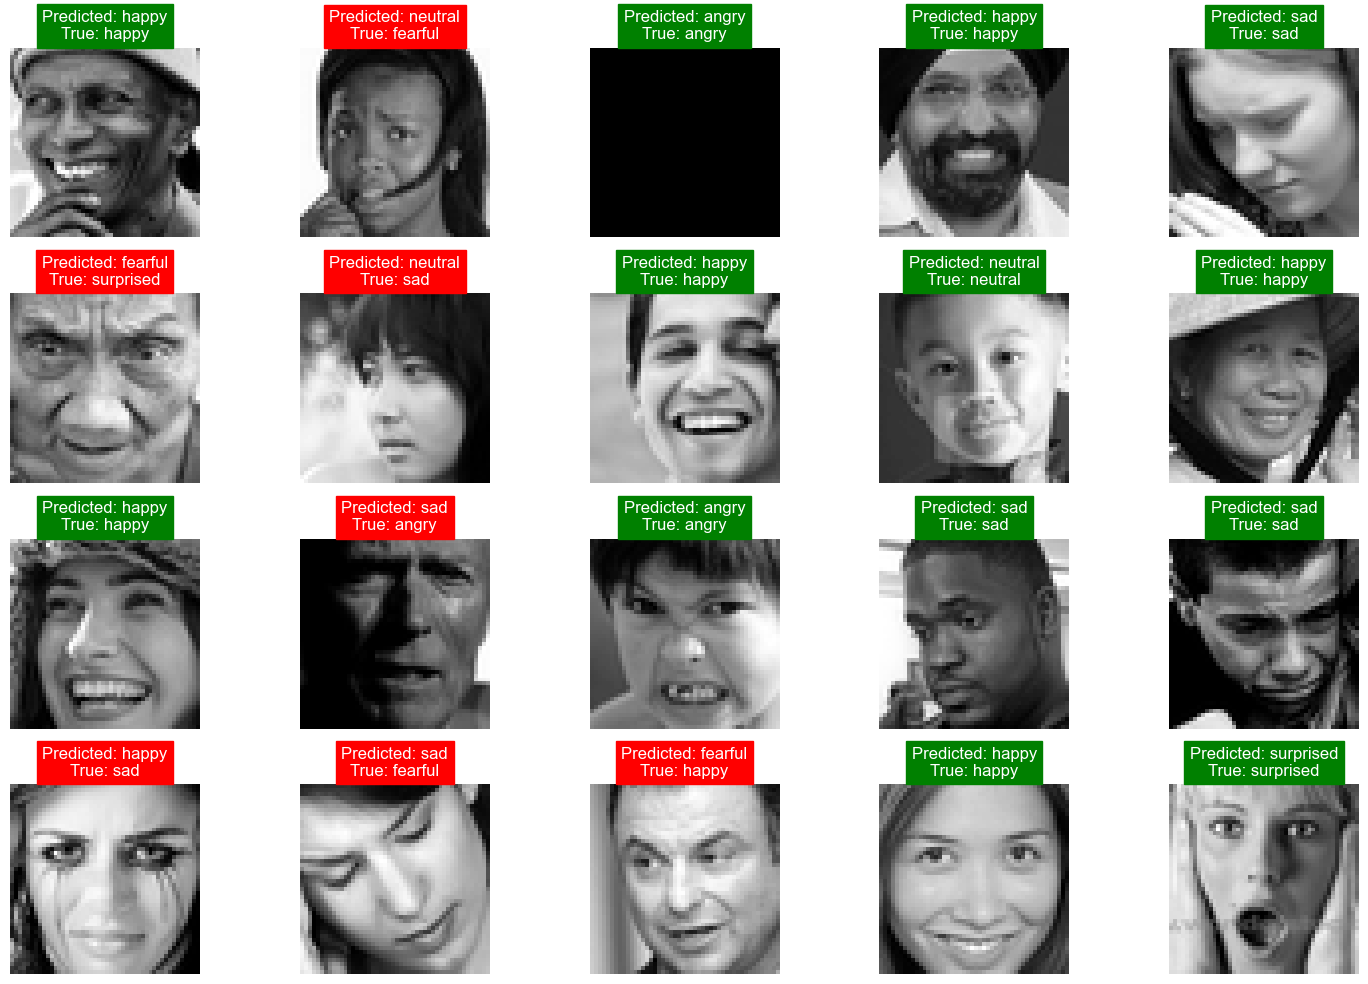

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the get_emotion function
def get_emotion(ohv):
    indx = np.argmax(ohv)
    emotions = ['angry', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
    return emotions[indx]

# Load a batch of random images from the test dataset
num_images = 20  # Thay đổi giá trị này thành 20
random_indices = np.random.randint(len(validation_generator), size=num_images)

# Initialize lists to store images, labels, and predictions
x_test_batch = []
y_test_batch = []
predictions_batch = []

# Retrieve images, labels, and predictions for each random index
for idx in random_indices:
    x_batch, y_batch = validation_generator[idx]
    x_test_batch.append(x_batch)
    y_test_batch.append(y_batch)
    predictions_batch.append(model.predict(x_batch))

# Concatenate the lists to form batches of images, labels, and predictions
x_test_batch = np.concatenate(x_test_batch, axis=0)
y_test_batch = np.concatenate(y_test_batch, axis=0)
predictions_batch = np.concatenate(predictions_batch, axis=0)

# Display the images with colored backgrounds based on prediction correctness
plt.figure(figsize=(15, 10))
for i in range(num_images):
    plt.subplot(4, 5, i + 1)  # Thay đổi 2 thành 4 để hiển thị 4 hàng
    plt.imshow(x_test_batch[i], cmap='gray')

    # Determine background color based on prediction correctness
    if np.argmax(predictions_batch[i]) == np.argmax(y_test_batch[i]):
        background_color = 'green'  # Correct prediction
    else:
        background_color = 'red'    # Incorrect prediction

    plt.title(f"Predicted: {get_emotion(predictions_batch[i])}\nTrue: {get_emotion(y_test_batch[i])}",
              backgroundcolor=background_color, color='white')
    plt.axis('off')

plt.tight_layout()
plt.show()

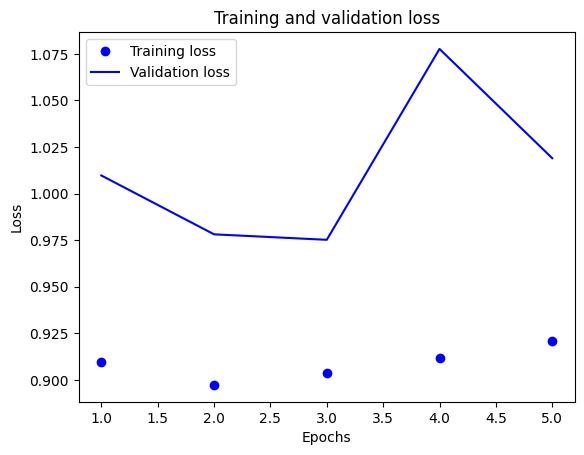

In [ ]:
# Plot the train and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

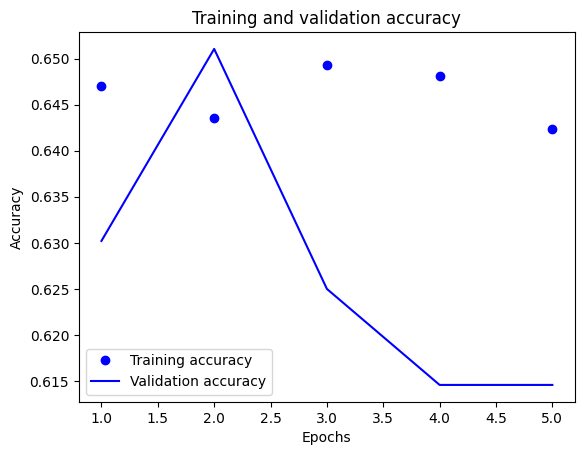

In [ ]:
# Plot the train and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

C:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


221/221 ━━━━━━━━━━━━━━━━━━━━ 540s 2s/step


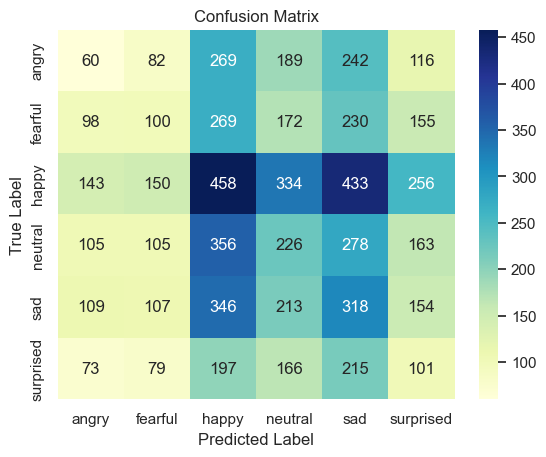

Classification Report:
               precision    recall  f1-score   support

       angry       0.10      0.06      0.08       958
     fearful       0.16      0.10      0.12      1024
       happy       0.24      0.26      0.25      1774
     neutral       0.17      0.18      0.18      1233
         sad       0.19      0.26      0.21      1247
   surprised       0.11      0.12      0.11       831

    accuracy                           0.18      7067
   macro avg       0.16      0.16      0.16      7067
weighted avg       0.17      0.18      0.17      7067



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Get the true labels and predicted labels for the validation set
validation_labels = validation_generator.classes
validation_pred_probs = model.predict(validation_generator)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(validation_generator.class_indices.keys())

# Plot the confusion matrix
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
class_report = classification_report(validation_labels, validation_pred_labels, target_names=class_names)
print("Classification Report:\n", class_report)